In [1]:
import numpy as np 
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance

# Preprocess images using PIL

- Open 
- Filter
- Contrast Change
- Grey scale
- Tricks to denoise 
- Binarize 
- Crop

We can use `PIL` package to preprocess images in order to do some other stuff(?). For example, we have the following image and we want to extract clear character from the images.

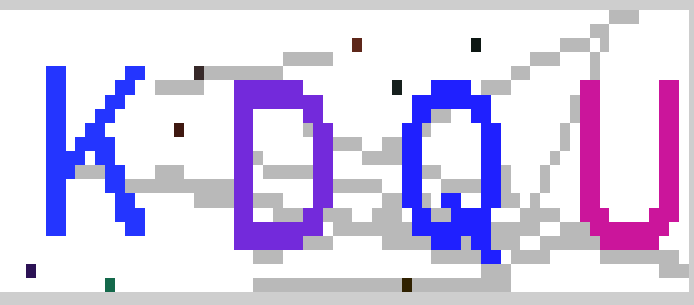

In [2]:
# Open images 
img = Image.open('./code.png')
img

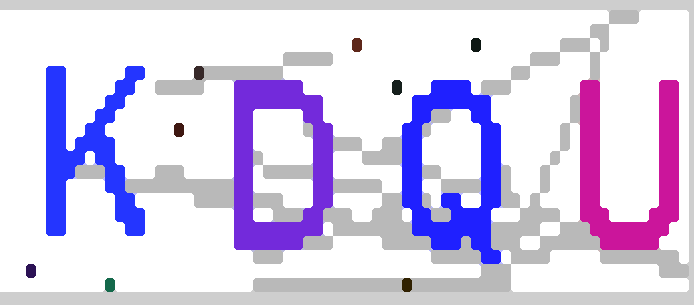

In [3]:
# Filter
# There are many filters, like averaging and maximgum filter. 
# Each one is used for different purpose.
# Here, we use a median fileter to keep the edge and the details of the imgage
img = img.filter(ImageFilter.MedianFilter(5)) 
img

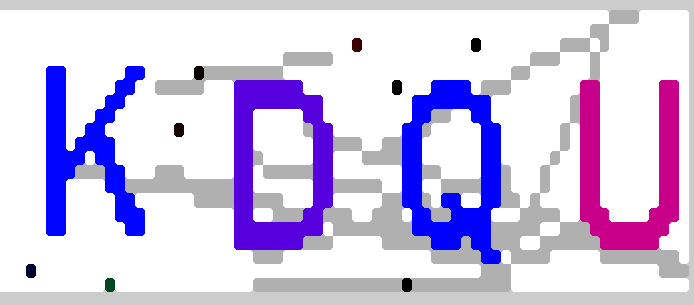

In [4]:
# Contrast Change
# Change paramters 'factor' to change the contrast
# We can increase the contrast to highlight characters in compare to other noise 
img = ImageEnhance.Contrast(img).enhance(1.3)#enhance()
img

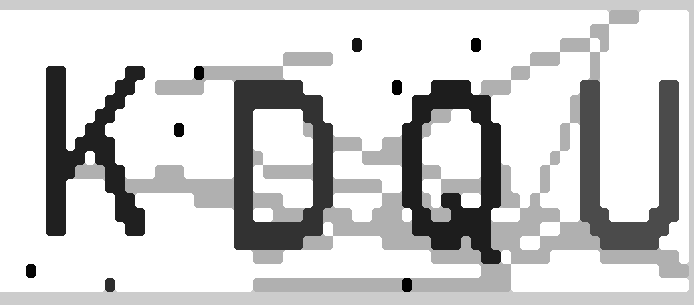

In [5]:
# Scale change
# We do not care about the color 
# change it to grey scale 
img = img.convert('L')
img

In [6]:
# However as you can seewe still have some unnecessary 
# lines in the background 
# we need to find a way to remove those lines 
# this approach has to be carefully used b
def remove_pixel(img, vrange=(150,220)):
    pixdata = img.load()
    w, h = img.size
    for j in range(h):
        for i in range(w):
            if pixdata[i,j] > vrange[0] and  pixdata[i,j] < vrange[1]:
                pixdata[i,j] = 255

    return img

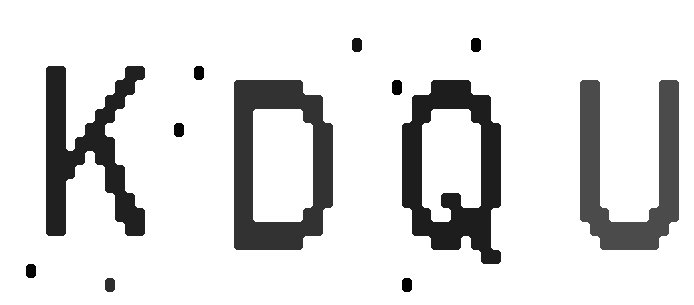

In [7]:
img = remove_pixel(img)
img

This is another way to denoise. For each pixel, we look its surrounding pixels. If it has more than 2 surrounding pixels belong to background, we label as noise. However, it does not work well in this case. 

```Python
def denoise(im):
    pixdata = im.load()
    w, h = im.size
    for j in range(1,h-1):
        for i in range(1,w-1):
            count=0
            if pixdata[i,j-1] > 245:
                count = count+1
            if pixdata[i,j+1] > 245:
                count = count+1
            if pixdata[i+1,j] > 245:
                count = count+1
            if pixdata[i-1,j] > 245:
                count = count+1
            if count > 2:
                pixdata[i,j] = 255
    return im
```

In [8]:
# Binarize
# Now, we can make the characters clearer to see by binarizing.
def binarizing(img, threshold):
    pixdata = img.load()
    w, h = img.size
    for j in range(h):
        for i in range(w):
            if pixdata[i,j] < threshold:
                pixdata[i,j] = 0
            else:
                pixdata[i,j] = 255
    return img

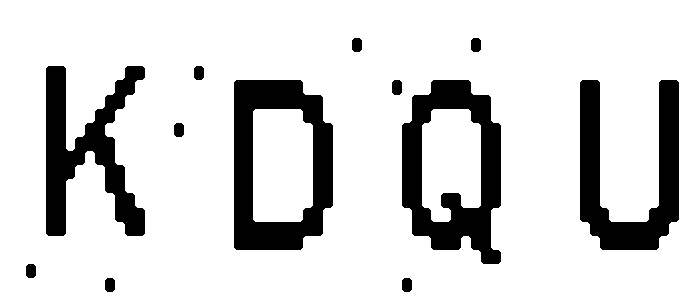

In [9]:
img = binarizing(img, 200)
img

In [10]:
# Crop
# Then we may need to crop imgages
n = 4
w, h = img.size
imgg_w = w/n
for i in range(n):
    img.crop((0 + imgg_w * i, 0, imgg_w * (i+1), h)).show()

In [11]:
# Numpy to PIL image 
Image.fromarray(np.random.randint(0,255,(30,30)).astype('uint8'))

In [12]:
# PIl image to array
np.array(img)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)